### Necessary data:
directory with scores and fingerprints or raw sdf files after docking

In [2]:
icm_scores = '/storage/margaritakovaleva/2022-07-22_tables'
dock_scores = '/storage/margaritakovaleva/2021-06-15_big_datasets'

AA2R_1 = f'{icm_scores}/4eiy/tables_for_prediction/Morgan_size=2048_radius=2'
AA2R_2 = f'{icm_scores}/4eiy/tables_for_prediction_second'
CB2_1 = f'{icm_scores}/5zty/tables_for_prediction/Morgan_size=2048_radius=2'
CB2_2 = '/storage/margaritakovaleva/accelerated_docking/5zty/docking_1'
AmpC = f'{dock_scores}/AmpC_screen_table_1M/tables_for_prediction/Morgan_size=2048_radius=2'
D4 = f'{dock_scores}/D4_screen_table_1M/tables_for_prediction/Morgan_size=2048_radius=2'

cols = ['ZincID' ,'Score']

In [1]:
import datetime as dt
import os
import glob
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm as tqdm
import matplotlib.pyplot as plt


def loggg(with_dataframe=True):
    def decorator(f):
        def wrapper(dataf, *args, **kwargs):
            tic = dt.datetime.now()  # Время начала выполнения функции
            result = f(dataf, *args, **kwargs)  # Выполнения функции
            toc = dt.datetime.now()  # Время окончания работы функции

            if with_dataframe == True:
                # Если у dataf и result есть аттрибут shape, то добавляются названия колонн и делается заптсь об изменении shape
                if hasattr(dataf, "shape") and hasattr(result, "shape"):
                    share_before = dataf.shape
                    shape_after = result.shape
                    added_columns = set(result.columns) - set(dataf.columns)
                    print(
                        f"{f.__name__},  shape {dataf.shape}->{result.shape},  took={toc-tic}"
                    )

            # запись о том, сколько времени занял этап
            else:
                print(f"{f.__name__} took={toc-tic}")

            return result

        return wrapper

    return decorator

In [3]:
def read_scores_from_path(path: str):
    scores_list = []
    for fle in glob.glob(f'{path}/*.csv'):
        scores = pd.read_csv(fle, header=0, usecols=cols)
        scores_list.append(scores)
    scores_df = pd.concat(scores_list, ignore_index=True)
    
    return scores_df['Score'].values

In [5]:
AA2R_1_scores = read_scores_from_path(AA2R_1)
AA2R_2_scores = read_scores_from_path(AA2R_2)
CB2_1_scores = read_scores_from_path(CB2_1)
CB2_2_scores = read_scores_from_path(CB2_2)
AmpC_scores = read_scores_from_path(AmpC)
D4_scores = read_scores_from_path(D4)

In [7]:
top_1_score = []
for data in [AA2R_1_scores, AA2R_2_scores, CB2_1_scores, CB2_2_scores, AmpC_scores, D4_scores]:
    pos = int(0.01 * len(data))
    top_1_score.append(np.sort(data)[pos])

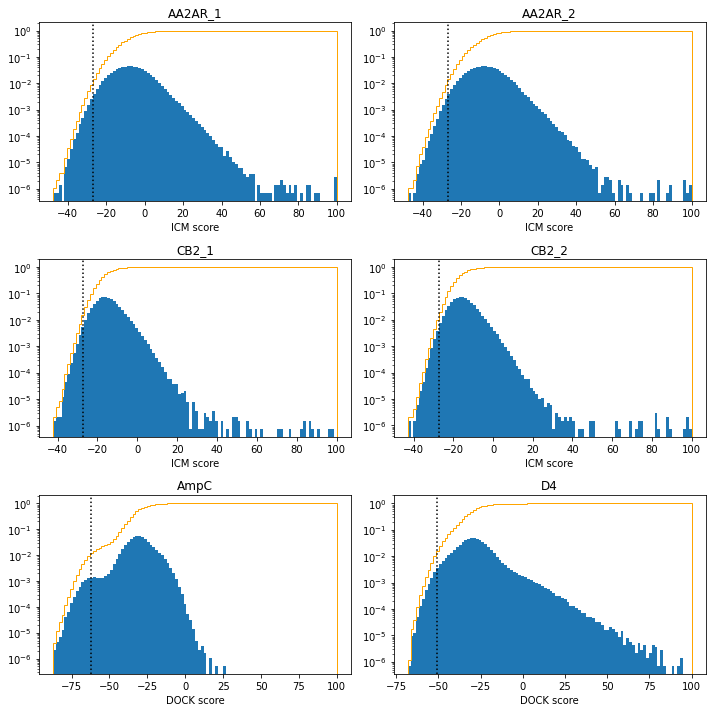

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(10,10))

for axis, data, name, score, score_name in zip(
    ax.flatten(),
    [AA2R_1_scores, AA2R_2_scores, CB2_1_scores, CB2_2_scores, AmpC_scores, D4_scores],
    ['AA2AR_1', 'AA2AR_2', 'CB2_1', 'CB2_2', 'AmpC', 'D4'],
    top_1_score,
    ['ICM score'] * 4 + ['DOCK score'] * 2
):
    
    axis.hist(
        data,
        density=True, log=True,
        range=(min(data), 100), bins=100,
        histtype='stepfilled'
    )
    axis.hist(
        data,
        density=True, log=True,
        range=(min(data), 100), bins=100,
        cumulative=True, histtype = 'step', 
        color='orange'
    )
    axis.axvline(x=score, color='black', linestyle='dotted')
    axis.title.set_text(name)
    axis.set_xlabel(score_name)
    
fig.tight_layout()
# plt.show()

plt.savefig('/storage/margaritakovaleva/accelerated_docking/figures/scores_distribution_v1.svg')